In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils.data_extractor import download_single_ticker_forex_data

In [3]:
eur_to_inr = download_single_ticker_forex_data("EUR", "INR")

/Users/arjunprakashrao/Drive/projects/forex-agent/utils/data_extractor.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  forex_data = yf.download(ticker_full, start='2000-01-02', end='2025-10-01')
[*********************100%***********************]  1 of 1 completed


In [4]:
eur_to_inr

,Close_EURINR=X
Date,
2003-12-01,54.700001
2003-12-02,55.139000
2003-12-03,55.181000
2003-12-04,55.000999
2003-12-05,55.370998
...,...
2025-08-27,101.920998
2025-08-28,102.009003
2025-08-29,102.233002


In [5]:
eur_to_inr['log_returns'] = np.log(eur_to_inr['Close_EURINR=X']/eur_to_inr['Close_EURINR=X'].shift(1))
eur_to_inr.dropna(inplace=True)
eur_to_inr

,Close_EURINR=X,log_returns
Date,,
2003-12-02,55.139000,0.007994
2003-12-03,55.181000,0.000761
2003-12-04,55.000999,-0.003267
2003-12-05,55.370998,0.006705
2003-12-08,55.563999,0.003480
...,...,...
2025-08-27,101.920998,0.002466
2025-08-28,102.009003,0.000863
2025-08-29,102.233002,0.002193


# Graphs

<Axes: xlabel='Date'>

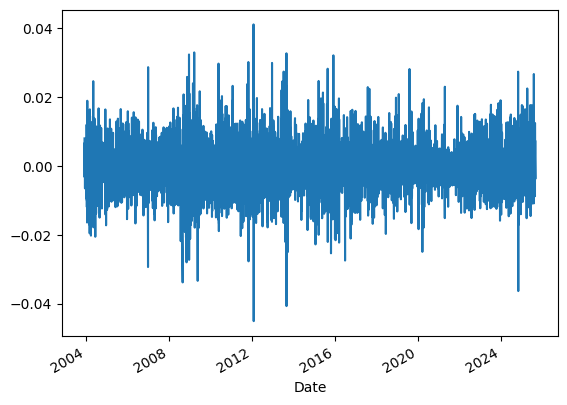

In [6]:
eur_to_inr['log_returns'].plot()

In [7]:
eur_to_inr.sum(), eur_to_inr.mean(), eur_to_inr.std()

(Close_EURINR=X    412204.294273
 log_returns            0.628704
 dtype: float64,
 Close_EURINR=X    73.047013
 log_returns        0.000111
 dtype: float64,
 Close_EURINR=X    12.161993
 log_returns        0.006859
 dtype: float64)

# Time series analysis

In [8]:
from statsmodels.tsa.stattools import adfuller
from models.time_series import time_series as ts

In [9]:
# Using ADF test to check for stationarity
eur_to_inr_list = eur_to_inr['log_returns'].to_list()
ad_stats = adfuller(eur_to_inr_list, regression='ct', autolag='BIC')
ad_stats

(np.float64(-33.348254052419634),
 0.0,
 4,
 5638,
 {'1%': np.float64(-3.960376624057109),
  '5%': np.float64(-3.411269000376628),
  '10%': np.float64(-3.127508725944114)},
 np.float64(-40079.28984703042))

In [10]:
# Simple moving average

eur_to_inr = ts.simple_moving_average(price_movement=eur_to_inr, price_row='Close_EURINR=X', periods=720)
eur_to_inr

,Close_EURINR=X,log_returns,SMA_last_720
Date,,,
2003-12-02,55.139000,0.007994,NaN
2003-12-03,55.181000,0.000761,NaN
2003-12-04,55.000999,-0.003267,NaN
2003-12-05,55.370998,0.006705,NaN
2003-12-08,55.563999,0.003480,NaN
...,...,...,...
2025-08-27,101.920998,0.002466,90.984552
2025-08-28,102.009003,0.000863,91.009265
2025-08-29,102.233002,0.002193,91.035075


<Axes: xlabel='Date'>

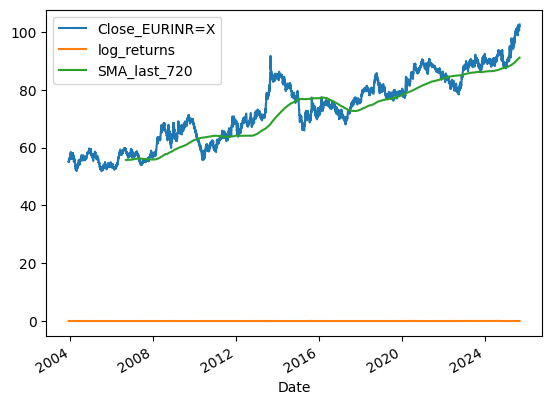

In [11]:
eur_to_inr.plot()

In [12]:
forecast = ts.arima_train_and_pred(eur_to_inr['log_returns'], pred_period=1)

/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model

In [13]:
eur_to_inr['log_returns']

Date
2003-12-02    0.007994
2003-12-03    0.000761
2003-12-04   -0.003267
2003-12-05    0.006705
2003-12-08    0.003480
                ...   
2025-08-27    0.002466
2025-08-28    0.000863
2025-08-29    0.002193
2025-09-01   -0.003783
2025-09-02    0.007096
Name: log_returns, Length: 5643, dtype: float64

In [14]:
forecast

1

In [18]:
backfill_arima = ts.backtest_arima(eur_to_inr['log_returns'][0:300])

/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be s

Accuracy of direction changes: 0.46366782006920415


/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/arjunprakashrao/Drive/projects/forex-agent/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
backfill_arima

,original,predicted
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
...,...,...
284,0,0
285,0,0
286,0,1
287,1,0


<Axes: >

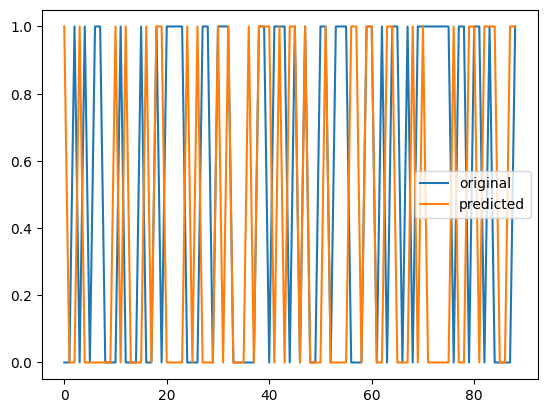

In [17]:
backfill_arima.plot()